# A* SEARCHING ALGORITHM

In [2]:
import math
from heapq import heappush, heappop
# A* Algorithm

# 1. Neighbors_and_weights can be an adjacency / weights list
#   a. Weights will hold temporal value
#   b. Want to reduce memory by implementing list of arrays rahter than an nxn matrix.
#      weights[node[i].key] = ((neighbor1.key, weight), (neighbor2.key, weight), ... )
# 2. An array pathTO will be used to keep track of our optimal route

v = 10000                              # length of nodes - test value 5
neighbors_and_weights = v*[]        # TBD
pathTo = v*[-1]                     # keeps track of optimal path

class Node:                                                  # the node's index in the list will be its key
    def __init__(self, key, x_coord, y_coord, neighbors_and_weights = []):  
        self.key = key                                       # needed to record pathTo
        self.x_coord = x_coord                               # coordinates to be used to determine distance(probably)
        self.y_coord = y_coord
        self.neighbors_and_weights = neighbors_and_weights   # neighbors and weights adjacency list
        self.g_score = 'inf'                                 # score of path from starting point to this vertex - TBD      
        self.f_score = 'inf'                                 # f_score = g_score + h_score
        self.landmark_distances = []                         # distances to all landmarks (landmark, distance)
        self.landmark_closest = -1                           # index to closest landmark - default 0
        
        # a. Maybe we could add another property here for pre-processing(something like "reach")
        #    Possibly employ some kind of density value of time per unit length since we have a time based metric
        # b. Can also add other values here as we need
            
def Heuristic(current_node, terminal_node):  # determines h_score - score of path from this vertex to goal - Euclidean
    current = current_node    # initial walking speed ~ 30 seconds per 50 meters(unit length) 
    goal = terminal_node      # can change this according to our map and increasing number of nodes

    Euclidean = math.sqrt(abs(current.x_coord - goal.x_coord)**2 + abs(current.y_coord - goal.y_coord)**2)
    h_score = Euclidean * 0.5            # half a minute(30 seconds) per unit length
    
    return h_score                       # so all our scores will be in minutes


def retrieve_path(pathTo, start, end):     # returns path
    parent = pathTo[end]
    path = [end]
    print end
    while  parent != start:
        print parent
        path.append(parent)
        parent = pathTo[parent]
    print start
    path.append(start)          # appending the starting point
    
    # return the full path from the end to start
    return path
    
# 3. F_score = g_score + h_score will be determined at each iteration
# 4. Will use "sets" as our data structure because of its innate prowess at finding if a key exists in the set
#   a. Sets are also good for finding the min value, which we will use for f_score
# 5. Will need to check for out of bounds (starting and ending points)

def A_star(Nodes, start, end):
    if start < 0 | start > v:
        return "The starting point doesn't exist in UCLA!"
    if end < 0 | end > v:
        return "The end point doesn't exist in UCLA!"
    
    closed_set = set()     # will store nodes that are visited
    open_set = set()       # will store nodes that are neighbors in the optimal path (minimaum f_score)
    
    goal = Nodes[end]
    entry = Nodes[start]                     # starting node
    entry.g_score = 0                        # starting node g_score is 0
    entry.f_score = Heuristic(entry, goal)   # starting node f_score = g_score + h_score 
    open_set.add((entry.f_score, entry))
    
    while (len(open_set) > 0):
        current = min(open_set)[1]       # pick node with lowest f_score
        
        if current == goal:
            return current.f_score      # returns estimated time - **can a function return 2 different value types?**
        
        open_set.remove((current.f_score, current))        # remove chosen node from open_set
        closed_set.add(current)                           # add chosen node to closed_set
        
        for i in current.neighbors_and_weights:
            if Nodes[i[0]] in closed_set:    # if Nodes[neighbor.key] is in closed set - do nothing
                continue                     
                                             # i[1] = weight of edge between current and neighbor
            g_new = current.g_score + i[1]   # compute new g_score
            
            if (Nodes[i[0]].f_score,Nodes[i[0]]) in open_set:  # if there is a duplicate of Nodes[neighbor.key] in open_set
                if Nodes[i[0]].g_score > g_new:   # compare new g_score and update if new score is lower
                    Nodes[i[0]].g_score = g_new
                    
            else:
                Nodes[i[0]].g_score = g_new                                 # if in neither, update g_score
                Nodes[i[0]].f_score = g_new + Heuristic(Nodes[i[0]], goal)  # calculate h_score and f_score
                pathTo[i[0]] = current.key                                     # record path to parent
                open_set.add((Nodes[i[0]].f_score, Nodes[i[0]]))            # add to open_set
                
    # Will not need to return anything here as our graph will be connected and will therfore always find a path.
    

## TESTING USING RANDOM GRAPHS

In [1]:
import random
import math
P=.2
N=10

def randomGraph(n,p):
    Edges=[[] for i in range(n)];
    for i in range(n):
        for j in range(i+1,n):
            if (random.uniform(0,1)<p):
                (Edges[i]).append([j,j])
                (Edges[j]).append([i,i])
    return Edges

def randomnode(N,P):
    neighbors_and_weights=randomGraph(N,P)
    nodes=[]
    for i in range(N):
        node=Node(i,random.randint(-10,10),random.randint(-10,10),neighbors_and_weights[i])
        node.neighbors_and_weights=neighbors_and_weights[i]
        nodes.append(node)
    for node in nodes:
        for j in node.neighbors_and_weights:
            j[1]=math.sqrt(abs(node.x_coord-nodes[j[0]].x_coord)**2+abs(node.y_coord-nodes[j[0]].y_coord)**2)
    return nodes

nodes=randomnode(N,P)

NameError: global name 'Node' is not defined

In [3]:
print nodes[0].key
print nodes[0].x_coord,nodes[0].y_coord
print nodes[9].neighbors_and_weights
print Heuristic(nodes[0],nodes[1])

0
-1 -10
[[1, 23.853720883753127]]
10.1980390272


In [4]:
key=2
print nodes[key].x_coord,nodes[key].y_coord

2 -6


## GRAPH VISUALIZATION

In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

""" Visualizing the graph in 2-dimensional space 
    the input variable 'path' is defaulted to None
    path is a list of Nodes                        """
def visualize_graph(nodes, path1 = None, path2 = None):
    # finding the starting key index
    min_key = 'inf'
    for node in nodes:
        if node.key < min_key:
            min_key = node.key
        
    N = len(nodes)
    fig, ax = plt.subplots()
    fig.set_size_inches(12,12)
    
    #lists of x_coord, y_coord
    x_coord = ['inf' for i in range(N)]
    y_coord = ['inf' for j in range(N)]

    # for better time complexity
    closed_key = []
    
    # for every node in the graph
    for node in nodes:
        x,y = (node.x_coord, node.y_coord)
        x_coord[node.key-min_key]= x
        y_coord[node.key-min_key]= y
        closed_key.append(node.key)
        # for every neighboring node
        for neigh_key_weight in node.neighbors_and_weights:
            if neigh_key_weight[0] not in closed_key:
                neigh_x = nodes[neigh_key_weight[0]-min_key].x_coord
                neigh_y = nodes[neigh_key_weight[0]-min_key].y_coord
                line1 = lines.Line2D((x,neigh_x),(y, neigh_y)
                                             , linewidth = neigh_key_weight[1]
                                             , color = 'red')
                ax.add_line(line1)
                    
    # scatter all points
    plt.scatter(x_coord, y_coord)
            
    # label all points by the key
    for key in closed_key:
        plt.annotate(str(key), (x_coord[key-min_key], y_coord[key-min_key]), textcoords='data')
        
    if path1 != None:  # if path is input
        x_coord = []
        y_coord = []
        for p in path1:
            x_coord.append(p.x_coord)
            y_coord.append(p.y_coord)
        plt.plot(x_coord, y_coord, color = 'blue')
    
    if path2 != None:  # if path is input
        x_coord = []
        y_coord = []
        for p in path2:
            x_coord.append(p.x_coord)
            y_coord.append(p.y_coord)
        plt.plot(x_coord, y_coord, color = 'green')
    
    plt.show()

    

## VISUALIZE THE GENERATED PATH

In [12]:
A_star(nodes,0,9)

# path list of key
path_by_key = []

#print nodes[99].g_score
if pathTo[9]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 0, 9) 

9
1
4
0


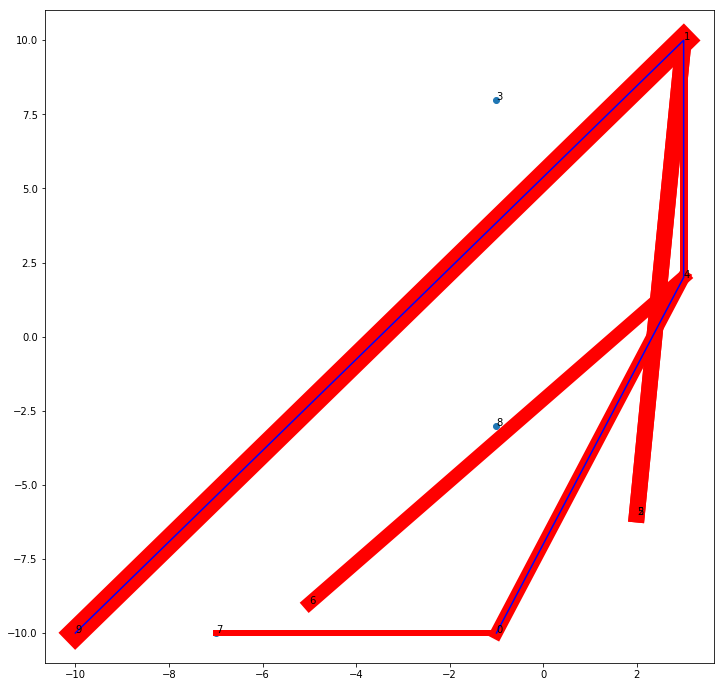

In [13]:
# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(nodes[key])

# visualize the path in blue line on the graph
visualize_graph(nodes, path_node)

In [14]:
from heapq import heappush, heappop

def dijkstra(nodes,start,end):
    distances = [float('inf') for i in range(len(nodes))] #initialize distances
    parents = [-1 for i in range(len(nodes))]
    distances[start]=0
    que=[start]
    while que:
        state=heappop(que)
        for neigh in nodes[state].neighbors_and_weights:
            dist_from_state=distances[state]+neigh[1] # neigh[1] = weight of neigh
            if dist_from_state<distances[neigh[0]]:
                distances[neigh[0]]=dist_from_state                
                parents[neigh[0]]=state #Keeps track of the parent
                if distances[neigh[0]]<float('inf'):
                    heappush(que,neigh[0])
    if distances[end]==float('inf'):
        print "No path"
        return [-1,[]]
    path=[end]
    cur_par=end
    while cur_par!=start:
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [distances[end],path]

In [15]:
print dijkstra(nodes,0,9)

[44.50283152442665, [9, 1, 4, 0]]


In [16]:
from heapq import heappush, heappop
import math

def h_score(curnode,endnode,effect):
    return effect*math.sqrt((curnode.x_coord-endnode.x_coord)**2+(curnode.y_coord-endnode.y_coord)**2)

def Astar_2(nodes,start,end,effect):
    parents = [-1 for i in range(len(nodes))]
    g_score = [float('inf') for i in range(len(nodes))]
    f_score = [float('inf') for i in range(len(nodes))]
    g_score[start]=0
    f_score[start]=h_score(nodes[start],nodes[end],effect)
    que=[]
    heappush(que,(f_score[start],nodes[start]))
    while que:
        cur=heappop(que)[1]
        if cur.key==end:
            break
        for neigh in cur.neighbors_and_weights:
            g_score_neigh=g_score[cur.key]+neigh[1] # neigh[1] = weight of neigh
            if g_score_neigh<g_score[neigh[0]]:
                g_score[neigh[0]]=g_score_neigh
                f_score[neigh[0]]=g_score_neigh+h_score(nodes[neigh[0]],nodes[end],effect)
                parents[neigh[0]]=cur.key #Keeps track of the parent
                if f_score[neigh[0]]<float('inf'):
                    heappush(que,(f_score[neigh[0]],nodes[neigh[0]]))
    path=[end]
    cur_par=end
    while cur_par!=start:
        if parents[cur_par]==-1:
            return 'No path'
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [g_score[end],path]

In [17]:
print Astar_2(nodes,0,9,0.5)

[44.50283152442665, [9, 1, 4, 0]]


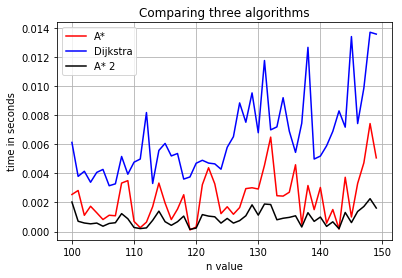

In [19]:
# comparing algorithms with randomnode
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(100,iters+100):
    N=k
    P=.1
    nodes=randomnode(N,P)
    time_prev =time.time()
    A_star(nodes,0,k-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,1,k-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(100,iters + 100),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(100,iters + 100),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.plot(range(100,iters + 100),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()

In [20]:
def seqgraph(n): # create n**2 nodes graph
    nodes=[]
    effect=0.5 # half a minute(30 seconds) per unit length
    index=0
    side=2*effect # weight for side edges (larger than 1 to make side weight more)
    diagonal=1.4142*effect # weight for diagonal edges, sqrt(2)=1.4142
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side),(index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+n,side),(index+n-1,diagonal)]
            nodes.append(node)  
        index=index+1
    for y in range(1,n-1):
        for x in range(n):
            if x!=0 and x!=n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side),
                                            (index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==0:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side),(index+n-1,diagonal),(index+n,side)]
                nodes.append(node)
            index=index+1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

number=10
k=99
seqnodes=seqgraph(number)
print seqnodes[k].key
print seqnodes[k].x_coord,seqnodes[k].y_coord
print seqnodes[k].neighbors_and_weights
print Heuristic(seqnodes[0],seqnodes[k])

99
9 9
[(88, 0.7071), (89, 1.0), (98, 1.0)]
6.36396103068


99
88
77
66
55
44
33
22
11
0


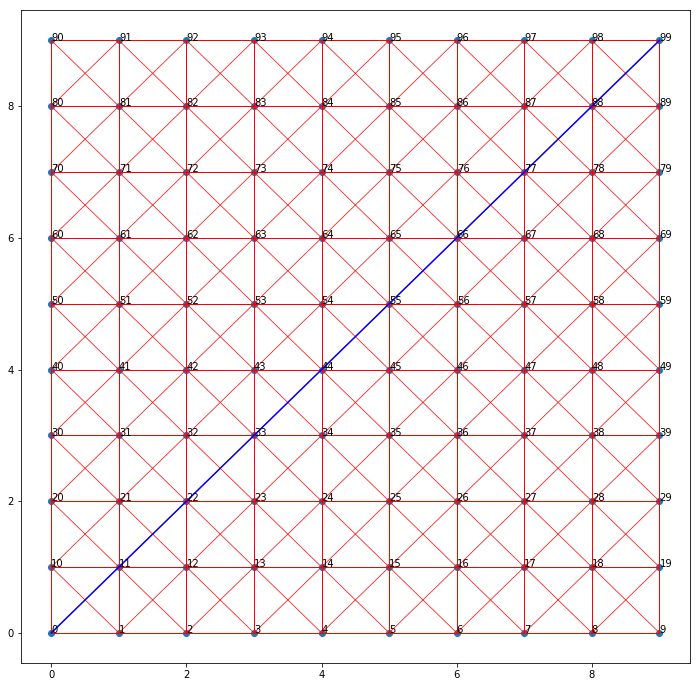

In [21]:
A_star(seqnodes,0,99)

# path list of key
path_by_key = []

#print nodes[99].g_score
if pathTo[99]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 0, 99) 

# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(seqnodes[key])

# visualize the path in blue line on the graph
visualize_graph(seqnodes, path_node)

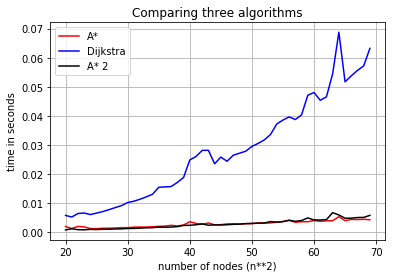

In [22]:
# comparing algorithms with seqgraph
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph(N)
    time_prev =time.time()
    A_star(nodes,0,k**2-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.legend()

plt.xlabel('number of nodes (n**2)')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()
# this takes more time to run

In [23]:
def straightlinegraph(n): # create a straight line graph with n nodes
    nodes=[]
    index=0
    side=1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

number=100
k=99
linenodes=straightlinegraph(number)
print linenodes[k].key
print linenodes[k].x_coord,seqnodes[k].y_coord
print linenodes[k].neighbors_and_weights
print Heuristic(linenodes[0],linenodes[k])

99
99 9
[(98, 1)]
49.5


99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


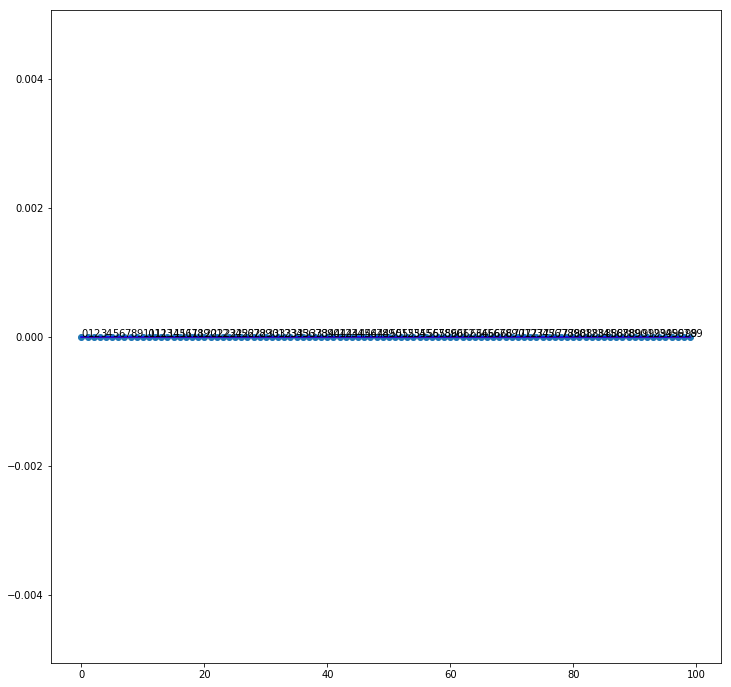

In [24]:
A_star(linenodes,0,99)

# path list of key
path_by_key = []
N=100

#print nodes[99].g_score
if pathTo[99]==-1:
    print 'No path'
else:
    path_by_key = retrieve_path(pathTo, 0, 99) 

# create a list of nodes from a list of keys of nodes
path_node = []
for key in path_by_key:
    path_node.append(linenodes[key])

# visualize the path in blue line on the graph
visualize_graph(linenodes, path_node)

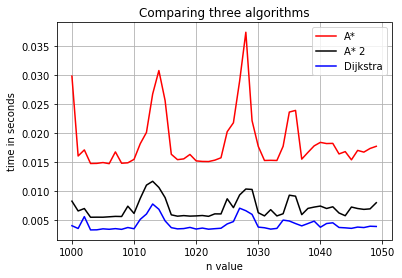

In [25]:
# comparing algorithms with straightlinegraph
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=1000

first_alg_times = []
second_alg_times = []
third_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=straightlinegraph(N)
    time_prev =time.time()
    A_star(nodes,0,k-1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k-1,0.5)
    third_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*') # red is A_star
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A* 2') # black is Astar_2
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()

In [26]:
# side weight < diagonal weight
def seqgraph2(n,side_effect,diagonal_effect): # create n**2 nodes graph
    nodes=[]
    index=0
    side=1*side_effect # weight for side edges
    diagonal=1.4142*diagonal_effect # weight for diagonal edges, sqrt(2)=1.4142
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+1,side),(index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index+1,side),(index+n,side),(index+n+1,diagonal)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,0,[])
            node.neighbors_and_weights=[(index-1,side),(index+n,side),(index+n-1,diagonal)]
            nodes.append(node)  
        index=index+1
    for y in range(1,n-1):
        for x in range(n):
            if x!=0 and x!=n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side),
                                            (index+n-1,diagonal),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==0:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side),(index+n,side),(index+n+1,diagonal)]
                nodes.append(node)
            elif x==n-1:
                node=Node(index,x,y,[])
                node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side),(index+n-1,diagonal),(index+n,side)]
                nodes.append(node)
            index=index+1
    for x in range(n):
        if x!=0 and x!=n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-n+1,diagonal),(index-1,side),(index+1,side)]
            nodes.append(node)
        elif x==0:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n,side),(index-n+1,diagonal),(index+1,side)]
            nodes.append(node)
        elif x==n-1:
            node=Node(index,x,n-1,[])
            node.neighbors_and_weights=[(index-n-1,diagonal),(index-n,side),(index-1,side)]
            nodes.append(node)  
        index=index+1
    return nodes

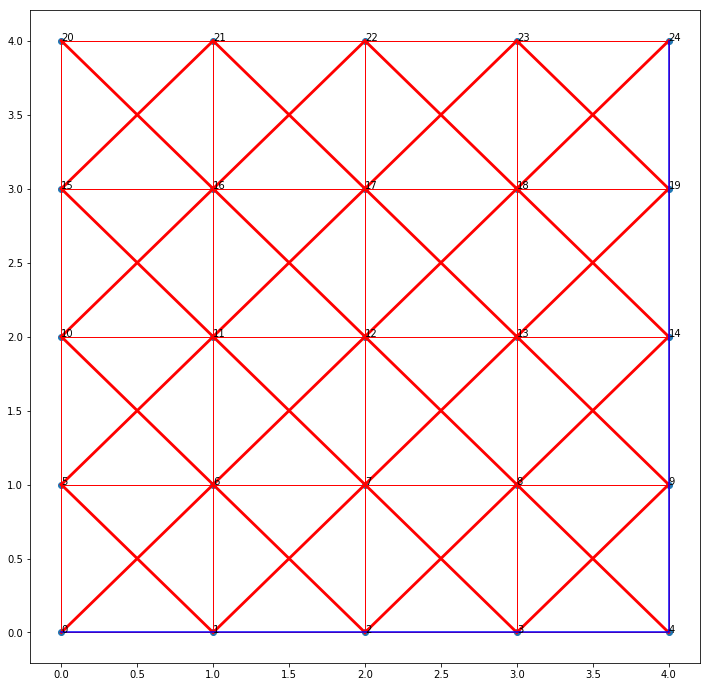

In [27]:
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
path_by_key=dijkstra(nodes,0,24)[1]
path_node = []
for key in path_by_key:
    path_node.append(nodes[key])

# visualize the path in blue line on the graph
visualize_graph(nodes, path_node)

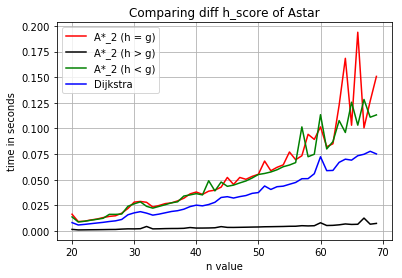

In [28]:
# comparing diff h_score
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph2(N,1,2) # diagonal weight > side weight
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,2)
    third_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,0.5)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*_2 (h = g)')   # red is Astar_2 with h_score=g_score
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A*_2 (h > g)') # black is Astar_2 with h_score>g_score
plt.plot(range(at_least,iters + at_least),forth_alg_times,color='green', label = 'A*_2 (h < g)') # green is Astar_2 with h_score<g_score
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing diff h_score of Astar')
plt.grid(True)

plt.show()
# need more time to run

In [29]:
# comparing path
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
print 'h_score=g_score: ',Astar_2(nodes,0,24,1)
print 'h_score<g_score: ',Astar_2(nodes,0,24,0.5)
print 'h_score>g_score: ',Astar_2(nodes,0,24,2)

h_score=g_score:  [8, [24, 23, 18, 17, 12, 11, 6, 1, 0]]
h_score<g_score:  [8, [24, 23, 18, 17, 12, 11, 6, 1, 0]]
h_score>g_score:  [8.8284, [24, 18, 17, 12, 11, 6, 1, 0]]


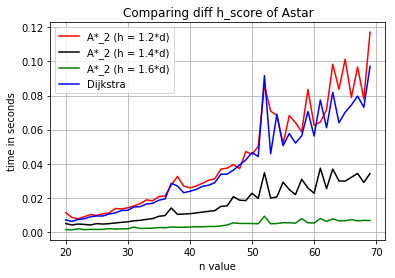

In [30]:
# comparing diff h_score with h_score>g_score
import time
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)
iters = 50
at_least=20

first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []

for k in range(at_least,iters+at_least):
    N=k
    nodes=seqgraph2(N,1,2) # diagonal weight > side weight
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.2)
    first_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    dijkstra(nodes,0,k**2-1)
    second_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.4)
    third_alg_times.append(time.time()-time_prev)
    time_prev =time.time()
    Astar_2(nodes,0,k**2-1,1.6)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(at_least,iters + at_least),first_alg_times,color='red', label = 'A*_2 (h = 1.2*d)')   # red is Astar_2 with h_score=1.2*distance
plt.plot(range(at_least,iters + at_least),third_alg_times,color='black', label = 'A*_2 (h = 1.4*d)') # black is Astar_2 with h_score=1.4*distance
plt.plot(range(at_least,iters + at_least),forth_alg_times,color='green', label = 'A*_2 (h = 1.6*d)') # green is Astar_2 with h_score=1.6*distance
plt.plot(range(at_least,iters + at_least),second_alg_times,color='blue', label = 'Dijkstra') # blue is dijkstra
plt.legend()

plt.xlabel('n value')
plt.ylabel('time in seconds')
plt.title('Comparing diff h_score of Astar')
plt.grid(True)

plt.show()
# need more time to run

In [31]:
# comparing path
nodes=seqgraph2(5,1,2) # diagonal weight > side weight
print 'dijkstra:             ',dijkstra(nodes,0,24)
print 'h_score=1.2*distance: ',Astar_2(nodes,0,24,1.2)
print 'h_score=1.4*distance: ',Astar_2(nodes,0,24,1.4)
print 'h_score=1.6*distance: ',Astar_2(nodes,0,24,1.6)

dijkstra:              [8, [24, 19, 14, 9, 4, 3, 2, 1, 0]]
h_score=1.2*distance:  [8, [24, 23, 18, 13, 12, 11, 6, 1, 0]]
h_score=1.4*distance:  [8, [24, 23, 18, 13, 12, 11, 6, 1, 0]]
h_score=1.6*distance:  [8, [24, 23, 18, 13, 12, 11, 6, 1, 0]]


# UCLA MAP

Assume that the movement between each node is straight (i.e. the distance between two node is Euclidean)

Number of nodes = 144 (i = 0,1,2,3,..,143)

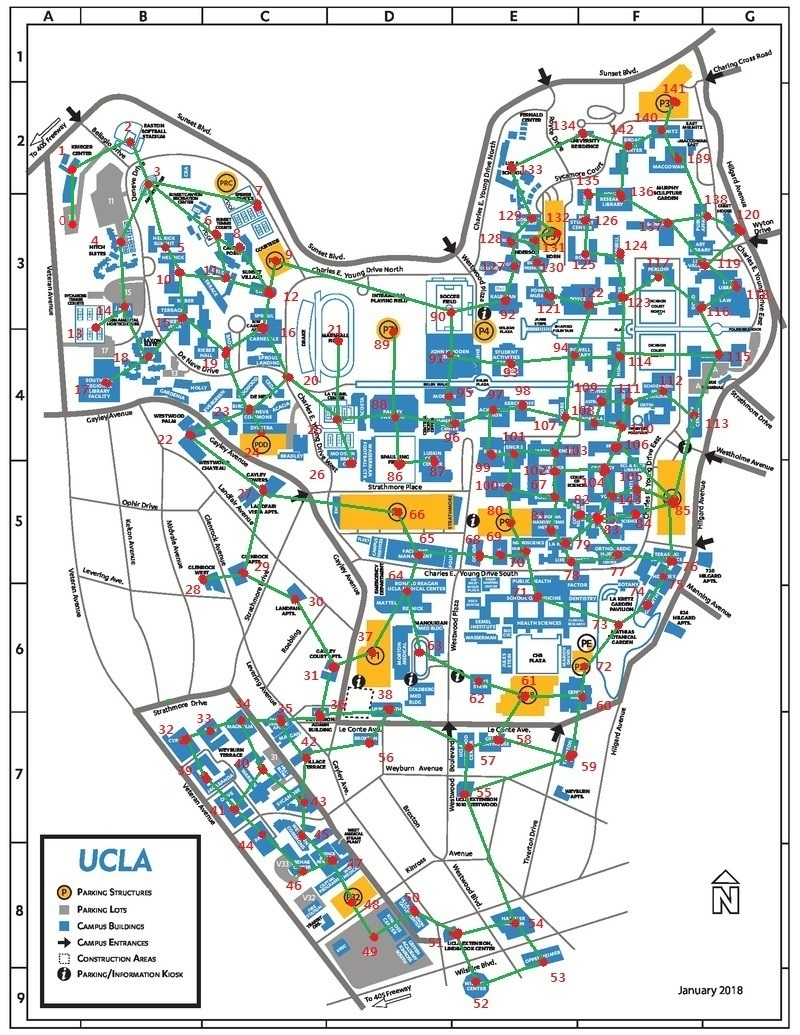

In [34]:
UCLA = [ Node(0, 4, 58, [(1, 1)]),        # I added one more node**
         Node(1, 4, 62, [(0, 1), (2, 2)]),
         Node(2, 9, 65, [(1, 2), (3, 2)]),
         Node(3, 10, 60,[(4, 2), (5, 2), (6, 3), (7, 3)]),
         Node(4, 8, 57, [(3, 2), (14, 2)]),
         Node(5, 11, 56, [(3, 2), (10, 1)]),
         Node(6, 16, 58, [(3, 3), (11, 2), (8, 1)]),
         Node(7, 19, 59, [(3, 3)]),
         Node(8, 18, 56, [(6, 1), (12, 2)]),
         Node(9, 21, 55, [(12, 1), (90, 8)]),
         Node(10, 12, 54, [(3, 2), (11, 2), (15, 2)]),
         Node(11, 17, 54, [(6, 2), (10, 2), (12, 2)]),
         Node(12, 20, 53, [(8, 2), (9, 1), (11, 2), (16, 1)]),
         Node(13, 6, 50, [(14, 1)]),
         Node(14, 8, 52, [(4, 2), (13, 1), (18, 2)]),
         Node(15, 12, 51, [(10, 2), (18, 2), (19, 2)]),
         Node(16, 19, 50, [(12, 1), (19, 1), (20, 2)]),
         Node(17, 7, 46, [(18, 2)]),
         Node(18, 11, 48, [(14, 2), (15, 2), (17, 2)]),
         Node(19, 17, 48, [(15, 2), (16, 1), (23, 2)]),
         Node(20, 22, 46, [(16, 2), (23, 2), (25, 2)]),
         Node(21, 26, 49, [(25, 2)]),
         Node(22, 14, 42, [(23, 2), (27, 3)]),
         Node(23, 19, 44, [(19, 2), (20, 2), (22, 2), (24, 1)]),
         Node(24, 20, 42, [(23, 1)]),
         Node(25, 26, 43, [(20, 2), (21, 2), (26, 1), (88, 2)]),
         Node(26, 27, 39, [(25, 1)]),
         Node(27, 20, 37, [(22, 3), (29, 3), (66, 5)]),
         Node(28, 16, 31, [(29, 1)]),
         Node(29, 18, 32, [(27, 3), (28, 1), (30, 2)]),
         Node(30, 24, 29, [(29, 2), (31, 3)]),
         Node(31, 27, 24, [(30, 3), (36, 2), (37, 1)]),
         Node(32, 13, 17, [(33, 1), (39, 1)]),
         Node(33, 15, 18, [(32, 1), (34, 1)]),
         Node(34, 18, 19, [(33, 1), (35, 1), (40, 1)]),
         Node(35, 22, 19, [(34, 1), (36, 1), (42, 1)]),
         Node(36, 25, 20, [(31, 2), (35, 1), (38, 2)]),
         Node(37, 29, 25, [(37, 1), (64, 2)]),
         Node(38, 30, 21, [(36, 2), (56, 1), (57, 3)]),
         Node(39, 14, 15, [(32, 1), (41, 1)]),
         Node(40, 20, 16, [(34, 1), (41, 1), (43, 1)]),
         Node(41, 17, 13, [(39, 1), (40, 1), (44, 1)]),
         Node(42, 23, 17, [(35, 1), (43, 1), (56, 2)]),
         Node(43, 23, 13, [(40, 1), (42, 1), (45, 1)]),
         Node(44, 20, 11, [(41, 1), (46, 1)]),
         Node(45, 23, 11, [(43, 1), (47, 1)]),
         Node(46, 23, 8, [(44, 1), (47, 1)]),
         Node(47, 25, 9, [(45, 1), (46, 1), (48, 1)]),
         Node(48, 26, 7, [(47, 1), (49, 1)]),
         Node(49, 28, 3, [(48, 1), (50, 1)]),
         Node(50, 32, 6, [(49, 1), (51, 1)]),
         Node(51, 33, 5, [(50, 1), (52, 1), (54, 2)]),
         Node(52, 35, 0, [(51, 1), (53, 2)]),
         Node(53, 43, 2, [(52, 2), (54, 1)]),
         Node(54, 38, 5, [(51, 2), (53, 1), (55, 5)]),
         Node(55, 34, 14, [(54, 5), (57, 1), (59, 3)]),
         Node(56, 30, 18, [(38, 1), (42, 2)]),
         Node(57, 34, 18, [(38, 3), (55, 1), (58, 1)]),
         Node(58, 37, 19, [(57, 1), (59, 2), (61, 1)]),
         Node(59, 44, 18, [(55, 3), (58, 2), (60, 2)]),
         Node(60, 45, 22, [(59, 2), (61, 2), (72, 1)]),
         Node(61, 40, 22, [(58, 1), (60, 2), (62, 1)]),
         Node(62, 35, 24, [(61, 1), (63, 2)]),
         Node(63, 32, 25, [(62, 2), (64, 2)]),
         Node(64, 30, 30, [(37, 2), (63, 2), (65, 1)]),
         Node(65, 31, 33, [(64, 1), (66, 1), (68, 2)]),
         Node(66, 29, 33, [(27, 5), (65, 1)]),
         Node(67, 41, 37, [(81, 2), (82, 1), (100, 2), (102, 1)]),
         Node(68, 36, 33, [(65, 2), (69, 1)]),
         Node(69, 38, 33, [(68, 1), (70, 1)]),
         Node(70, 41, 33, [(69, 2), (71, 1), (80, 1)]),
         Node(71, 42, 30, [(70, 1), (73, 4)]),
         Node(72, 45, 24, [(60, 1), (73, 2)]),
         Node(73, 48, 23, [(71, 4), (72, 2), (74, 1)]),
         Node(74, 51, 24, [(73, 1), (75, 1)]),
         Node(75, 53, 32, [(74, 1), (76, 1)]),
         Node(76, 54, 33, [(75, 1), (77, 2), (85, 2)]),
         Node(77, 48, 33, [(76, 2), (78, 1), (83, 1)]),
         Node(78, 44, 33, [(77, 1), (79, 1)]),
         Node(79, 43, 33, [(78, 1), (81, 2), (83, 2)]),
         Node(80, 39, 36, [(70, 2), (100, 2)]),
         Node(81, 42, 34, [(67, 2), (79, 2)]),
         Node(82, 44, 37, [(67, 1), (83, 1)]),
         Node(83, 45, 36, [(77, 1), (79, 2), (82, 1), (84, 1), (143, 1)]),
         Node(84, 50, 35, [(83, 1), (85, 1)]),
         Node(85, 54, 38, [(76, 2), (84, 1), (105, 1), (106, 3), (113, 4)]),
         Node(86, 29, 39, [(87, 1), (88, 1)]),
         Node(87, 33, 39, [(87, 1)]),
         Node(88, 29, 43, [(25, 2), (86, 1), (89, 2), (96, 2)]),
         Node(89, 29, 50, [(88, 2)]),
         Node(90, 35, 51, [(9, 2), (91, 2), (92, 2)]),
         Node(91, 35, 47, [(90, 2), (93, 2), (95, 2)]),
         Node(92, 39, 52, [(90, 2), (127, 1)]),
         Node(93, 40, 46, [(91, 2), (94, 2)]),
         Node(94, 44, 47, [(93, 2), (107, 2), (114, 1), (122, 1)]),
         Node(95, 35, 45, [(91, 2), (96, 1)]),
         Node(96, 35, 43, [(88, 2), (95, 1), (97, 1)]),
         Node(97, 38, 44, [(96, 1), (98, 1), (99, 1)]),
         Node(98, 41, 45, [(97, 1), (107, 1)]),
         Node(99, 38, 40, [(97, 1), (101, 1)]),
         Node(100, 39, 36, [(67, 2), (80, 2), (101, 1)]),
         Node(101, 39, 40, [(99, 1), (100, 1), (103, 2)]),
         Node(102, 41, 38, [(67, 1), (103, 1), (104, 2)]),
         Node(103, 41, 40, [(101, 2), (102, 1), (107, 1)]),
         Node(104, 46, 39, [(102, 2), (106, 1), (143, 1)]),
         Node(105, 50, 38, [(85, 1), (143, 1)]),
         Node(106, 48, 40, [(85, 3), (104, 1), (110, 1)]),
         Node(107, 44, 42, [(94, 2), (98, 1), (103, 1), (108, 1)]),
         Node(108, 46, 41, [(107, 1), (109, 1), (110, 1)]),
         Node(109, 47, 43, [(108, 1), (111, 1), (114, 1)]),
         Node(110, 49, 41, [(106, 1), (108, 1), (111, 1)]),
         Node(111, 49, 43, [(109, 2), (110, 2), (112, 1)]),
         Node(112, 52, 41, [(111, 1), (113, 2)]),
         Node(113, 55, 39, [(85, 4), (112, 2), (115, 3)]),
         Node(114, 49, 47, [(94, 1), (109, 1), (115, 2), (123, 1)]),
         Node(115, 57, 47, [(113, 3), (114, 2), (116, 1)]),
         Node(116, 55, 52, [(115, 1), (117, 1), (118, 1)]),
         Node(117, 52, 55, [(116, 1), (123, 1)]),
         Node(118, 58, 54, [(116, 1), (119, 1)]),
         Node(119, 55, 55, [(118, 1), (120, 2), (137, 2)]),
         Node(120, 58, 58, [(119, 2), (138, 1)]),
         Node(121, 43, 53, [(122, 1), (130, 1)]),
         Node(122, 46, 53, [(94, 1), (121, 1), (123, 1)]),
         Node(123, 49, 54, [(114, 1), (117, 1), (122, 1), (124, 1)]),
         Node(124, 49, 56, [(123, 1), (125, 1)]),
         Node(125, 45, 56, [(124, 1), (126, 1)]),
         Node(126, 45, 58, [(125, 1), (135, 1)]),
         Node(127, 40, 55, [(92, 1), (128, 1)]),
         Node(128, 40, 57, [(127, 1), (129, 1), (131, 1)]),
         Node(129, 42, 58, [(128, 1), (132, 1), (133, 2)]),
         Node(130, 43, 55, [(121, 1), (131, 1)]),
         Node(131, 43, 57, [(130, 1), (132, 1)]),
         Node(132, 44, 58, [(129, 2), (131, 2)]),
         Node(133, 40, 62, [(129, 2), (134, 4)]),
         Node(134, 46, 66, [(133, 4), (142, 2)]),
         Node(135, 46, 60, [(126, 1), (136, 1)]),
         Node(136, 49, 60, [(135, 1), (137, 1), (142, 1)]),
         Node(137, 53, 58, [(119, 2), (136, 1), (138, 1)]),
         Node(138, 55, 59, [(120, 1), (137, 1), (139, 2)]),
         Node(139, 53, 60, [(138, 2), (140, 1)]),
         Node(140, 51, 67, [(139, 1), (141, 1), (142, 1)]),
         Node(141, 52, 70, [(140, 1)]),
         Node(142, 49, 65, [(134, 2), (140, 1)]),
         Node(143, 48, 37, [(83, 1), (104, 1), (105, 1)])
       ]

* Thickness of edges in the graph is an visual indicator of weight of edges <br>
* Thicker the edge, higher the weight <br>

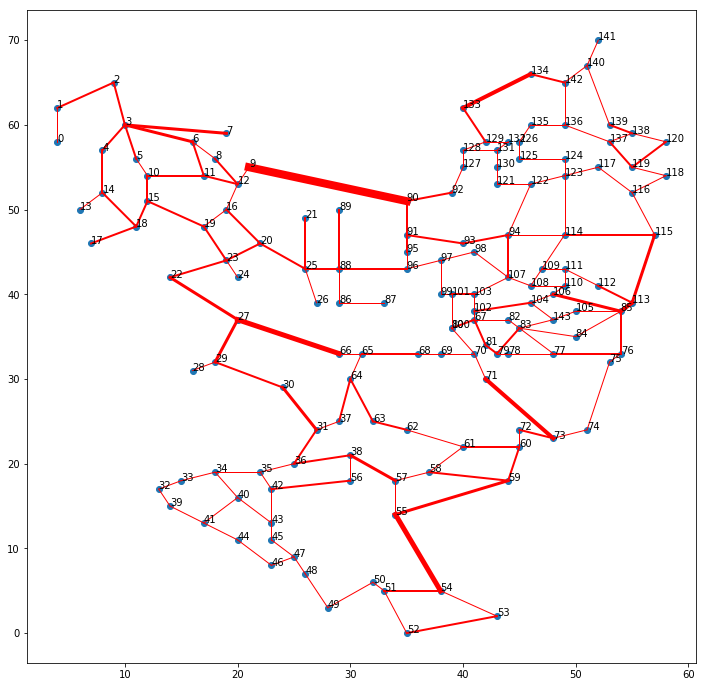

In [33]:
visualize_graph(UCLA)

### PRE-PROCESSING BY "LANDMARKS"
Reference: https://www.microsoft.com/en-us/research/wp-content/uploads/2004/07/tr-2004-24.pdf <br>
Motivation: The dillemma between 'speed' and 'memory' is always underlining in the problem of finding the shortest path using A* Search Algorithm. <br>
Limitation: the memory allocation of pre-processed distances between a node and any landmark may cause a worse memory complexity <br>
<br>

(1) To make $n^2$ number of landmarks, they would be pre-assigned as the centers of $n^2$ partition.

In [35]:
import math

class partitions:
    # _max is a tuple of the maximum xy-coordinate
    # _min is a tuple of the minimum xy-coordinate
    # n_sq is a squared value of i where i = 1,2,3,4,...
    def __init__(self, _max, _min, n_sq, nodes):
        x_partition = []
        y_partition = []
        # make the n^2 partititions
        x_len = _max[0]-_min[0]
        y_len = _max[1]-_min[1]
        n = math.sqrt(n_sq)
        for i in range(int(n)+1):
            x_partition.append(_min[0] + i*(x_len/n))
            y_partition.append(_min[1] + i*(y_len/n))
        
        landmark = [] # store node key that is landmark
        center_coord=[] # the coord of center of each partitions
        # the node that closest to the center of each partitions is the landmarks
        for i in range(int(n)):
            for j in range(int(n)):
                center_coord.append(((x_partition[i] + x_partition[i+1])/2,(y_partition[j] + y_partition[j+1])/2))
        for center in center_coord:
            dist='inf'
            x=center[0]
            y=center[1]
            for node in nodes:
                lm_x=node.x_coord
                lm_y=node.y_coord
                new_dist = math.sqrt((x-lm_x)**2 + (y-lm_y)**2)
                if new_dist < dist:
                    dist = new_dist
                    landmark_node=node
            landmark.append(landmark_node.key)
        landmark=sorted(landmark)
        
        self.x_partition = x_partition
        self.y_partition = y_partition
        self.landmark = landmark
        self.nodes=nodes
    
    # to learn which landmark a node is closest to 
    def which_landmark(self, node):
        landmark_index = -1
        dist = 'inf'
        x = node.x_coord
        y = node.y_coord
        for i in range(len(self.landmark)):
            lm_x = nodes[self.landmark[i]].x_coord
            lm_y = nodes[self.landmark[i]].y_coord
            
            # eucledean distance between a landmark and a node
            new_dist = math.sqrt((x-lm_x)**2 + (y-lm_y)**2)
            #print new_dist, dist          # for debugging
            if new_dist < dist:
                dist = new_dist
                landmark_index = i
            
        return landmark_index

In [36]:
import numpy as np
from heapq import heappush, heappop

def dijkstra(nodes,start,end): # input key of nodes
    distances = [float('inf') for i in range(len(nodes))] #initialize distances
    parents = [-1 for i in range(len(nodes))]
    distances[start]=0
    que=[start]
    while que:
        state=heappop(que)
        for neigh in nodes[state].neighbors_and_weights:
            dist_from_state=distances[state]+neigh[1] # neigh[1] = weight of neigh
            if dist_from_state<distances[neigh[0]]:
                distances[neigh[0]]=dist_from_state                
                parents[neigh[0]]=state #Keeps track of the parent
                if distances[neigh[0]]<float('inf'):
                    heappush(que,neigh[0])
    if distances[end]==float('inf'):
        print "No path"
        return [-1,[]]
    path=[end]
    cur_par=end
    while cur_par!=start:
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [distances[end],path]

# a distance from the closest landmark to the node
## for each landmark, precompute the distance from and to the node
def distance_landmark_node(xy_landmark, Nodes): # input landmark_node_key
    #d = [[] for i in range(len(Nodes))]     - commented this out for now
    for node in Nodes:
        node.landmark_distances=[-1 for j in range(len(xy_landmark))] # initial the landmark_distances in node
        i = 0      # landmark index
        d = 'inf'  # default infinity
        for landmark in xy_landmark:            # here landmark is the index of nodes
            #d[node.key].append(dijkstra(Nodes,landmark,node.key)[0])   - commented this out for now
            d_temp = dijkstra(Nodes, node.key, landmark)[0]
            node.landmark_distances[i] = (landmark, d_temp)
            if d_temp < d:
                d = d_temp
                #node.landmark_distances[i] = (landmark, d)
                node.landmark_closest = i
            i += 1
    #return d
                    
# lower bound #1: d(v,w) >= d(v,A) + d(A,w) by Triangular Inequality where A is the chosen landmark
# Hence, d(v,w) >= d(A,w) - d(A,v)
# lower bound #2: d(v,w) >= d(A,w) + d(v,A)
# hence, d(v,w) >= d(v,A) - d(w,A)
# ==> lower bound = max{lower_bound_1, lower_bound_2}
def landmark_heuristic(current_node, terminal_node): #, dist_landmark_to_node, closest_landmark_list):
    current = current_node
    goal = terminal_node
    #d = (np.array(dist_landmark_to_node).transpose())    # d[landmark][node]  (input is d[node][landmark])
    
    ### we need to implement the best_landmark function to find the best landmark to use it for heuristic
    ## cncli : current_node_closest_landmark_index (i.e. the index of the closest landmark of the current node)
    ## tncli : terminal_node_closest_landmark_index (i.e. the index of the closest landmark of the terminal node)
    ## cncli = closest_landmark_list[current_node.key]
    #tncli = closest_landmark_list[terminal_node.key]
    
    #print "tncl, tncl_i, goal.key, current.key:", tncl, tncl_i, goal.key, current.key
    #lower_bound1 = abs(d[tncli][goal.key] - d[tncli][current.key])
    
    landmark_key = goal.landmark_closest
    h_score = abs(current.landmark_distances[landmark_key][1] - goal.landmark_distances[landmark_key][1])
    
    return h_score
    #return lower_bound1
    

# adopting the change in heuristic function
def preprocessed_A_star(Nodes, start, end):
    if start < 0 | start > v:
        return "The starting point doesn't exist in UCLA!"
    if end < 0 | end > v:
        return "The end point doesn't exist in UCLA!"
    
    closed_set = set()     # will store nodes that are visited
    open_set = set()       # will store nodes that are neighbors in the optimal path (minimaum f_score)
    
    goal = Nodes[end]
    entry = Nodes[start]                     # starting node
    entry.g_score = 0                        # starting node g_score is 0
    entry.f_score = landmark_heuristic(entry, goal) #, dist_landmark_to_node,closest_landmark_list) 
    open_set.add((entry.f_score, entry))
    
    while (len(open_set) > 0):
        current = min(open_set)[1]       # pick node with lowest f_score
        
        if current == goal:
            return current.f_score      # returns estimated time - **can a function return 2 different value types?**
        
        open_set.remove((current.f_score, current))        # remove chosen node from open_set
        closed_set.add(current)                           # add chosen node to closed_set
        
        for i in current.neighbors_and_weights:
            if Nodes[i[0]] in closed_set:    # if Nodes[neighbor.key] is in closed set - do nothing
                continue                     
                                             # i[1] = weight of edge between current and neighbor
            g_new = current.g_score + i[1]   # compute new g_score
            
            if (Nodes[i[0]].f_score,Nodes[i[0]]) in open_set:  # if there is a duplicate of Nodes[neighbor.key] in open_set
                if Nodes[i[0]].g_score > g_new:   # compare new g_score and update if new score is lower
                    Nodes[i[0]].g_score = g_new
                    
            else:
                Nodes[i[0]].g_score = g_new                                 # if in neither, update g_score
                Nodes[i[0]].f_score = g_new + landmark_heuristic(Nodes[i[0]], goal) #, dist_landmark_to_node,closest_landmark_list) 
                pathTo[i[0]] = current.key                                     # record path to parent
                open_set.add((Nodes[i[0]].f_score, Nodes[i[0]]))            # add to open_set
                
    # Will not need to return anything here as our graph will be connected and will therfore always find a path.

In [37]:
from heapq import heappush, heappop

def preprocessed_A_star_2(nodes, start, end):
    if start < 0 | start > v:
        return "The starting point doesn't exist in UCLA!"
    if end < 0 | end > v:
        return "The end point doesn't exist in UCLA!"
    
    parents = [-1 for i in range(len(nodes))]
    g_score = [float('inf') for i in range(len(nodes))]
    f_score = [float('inf') for i in range(len(nodes))]
    g_score[start] = 0
    f_score[start] = landmark_heuristic(nodes[start], nodes[end]) #, dist_landmark_to_node, closest_landmark_list)
    que=[]
    heappush(que,(f_score[start],nodes[start]))
    while que:
        cur=heappop(que)[1]
        if cur.key==end:
            break
        for neigh in cur.neighbors_and_weights:
            g_score_neigh=g_score[cur.key]+neigh[1] # neigh[1] = weight of neigh
            if g_score_neigh<g_score[neigh[0]]:
                g_score[neigh[0]]=g_score_neigh
                f_score[neigh[0]]=g_score_neigh+landmark_heuristic(nodes[neigh[0]],nodes[end]) #, dist_landmark_to_node, closest_landmark_list)
                parents[neigh[0]]=cur.key #Keeps track of the parent
                if f_score[neigh[0]]<float('inf'):
                    heappush(que,(f_score[neigh[0]],nodes[neigh[0]]))
    path=[end]
    cur_par=end
    while cur_par!=start:
        if parents[cur_par]==-1:
            return 'No path'
        path.append(parents[cur_par])
        cur_par=parents[cur_par]
    return [g_score[end],path]

In [38]:
import time
import numpy as np
import matplotlib.pyplot as plt #for the plotting functions (2D, 3D is separate)

seed = 200
P = 0.1
max_xy = (10,10)
min_xy = (-10,-10)

nodes = randomnode(seed, P)
#nodes=UCLA
p1 = partitions(max_xy, min_xy, 15, nodes)

# a list of closest landmark according to the index 'key'
closest_landmark = [-1 for node in nodes]
for key in range(len(nodes)):
    closest_landmark[key] = p1.which_landmark(nodes[key])
    
print closest_landmark

[0, 3, 1, 7, 1, 5, 0, 6, 5, 8, 7, 7, 5, 5, 5, 7, 0, 4, 1, 3, 2, 3, 7, 6, 3, 8, 5, 6, 8, 8, 2, 0, 7, 2, 3, 2, 3, 5, 7, 6, 3, 1, 0, 4, 2, 4, 1, 8, 0, 7, 7, 5, 1, 3, 3, 2, 3, 4, 2, 8, 2, 6, 7, 0, 3, 0, 3, 3, 3, 4, 2, 5, 4, 1, 7, 8, 3, 7, 7, 0, 2, 0, 4, 8, 5, 5, 8, 5, 7, 3, 5, 7, 3, 5, 2, 8, 8, 5, 5, 7, 5, 5, 8, 4, 8, 5, 7, 6, 3, 5, 6, 6, 8, 3, 0, 4, 2, 6, 7, 0, 8, 7, 8, 4, 5, 7, 5, 7, 6, 4, 3, 8, 7, 4, 7, 7, 4, 4, 7, 8, 5, 5, 0, 1, 8, 3, 3, 3, 8, 2, 3, 4, 5, 0, 6, 4, 1, 4, 0, 7, 8, 6, 0, 8, 5, 6, 3, 5, 3, 5, 7, 7, 6, 5, 5, 3, 5, 5, 7, 8, 8, 8, 5, 7, 3, 4, 3, 5, 7, 8, 7, 8, 7, 5, 3, 3, 6, 0, 3, 7]


In [39]:
# checking size of set(closest_landmark)
import math
print p1.landmark
print len(set(closest_landmark))

[16, 18, 33, 36, 45, 71, 110, 118, 131]
9


In [40]:
import time
# PREPROCESSING: precompute the distance between landmarks and nodes, and store it as a list of lists in memory
time_prev = time.time()
distance_landmark_node(p1.landmark, nodes)
print "Time taken to generate the matrix (for preprocessing): ",time.time()-time_prev
# takes so much time to compute if size of set(closest_landmark) is big

Time taken to generate the matrix (for preprocessing):  28.600856781


In [41]:
# TEST THE CORRECTNESS OF distance_landmark_node
key = 0
print 'The closest landmark to node '+str(key)+' is '+str(p1.landmark[nodes[key].landmark_closest])
print 'The distance from node '+str(key)+' to node '+str(p1.landmark[nodes[key].landmark_closest])+' is '+str(nodes[key].landmark_distances[nodes[key].landmark_closest][1])
print dijkstra(nodes,p1.landmark[nodes[key].landmark_closest],key)[0]

The closest landmark to node 0 is 16
The distance from node 0 to node 16 is 5.84161925296
5.84161925296


### TEST ON A RANDOM GRAPH

In [42]:
print "------------------------A* TEST------------------------"
A_star(nodes, 0, 100)
path_by_key1 = retrieve_path(pathTo,0,100)
print 'distance',nodes[100].g_score

print "------------------Preprocessed A* Test-------------------"
preprocessed_A_star(nodes, 0, 100)
path_by_key2 = retrieve_path(pathTo,0,100)
print 'distance',nodes[100].g_score

print "------------------Preprocessed A*_2 Test-------------------"
print preprocessed_A_star_2(nodes, 0, 100)
print "-----------------------------------------------------------"

------------------------A* TEST------------------------
100
48
79
156
0
distance 14.0527218039
------------------Preprocessed A* Test-------------------
100
186
79
156
0
distance 14.0527218039
------------------Preprocessed A*_2 Test-------------------
[14.052721803891759, [100, 154, 79, 156, 0]]
-----------------------------------------------------------


### TIME-COMPLEXITY COMPARISON

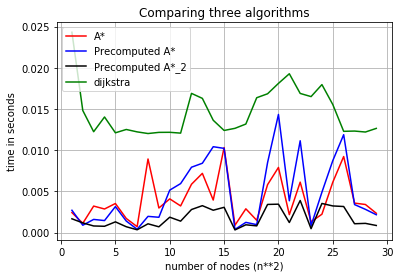

In [43]:
iters = 30
# comparing the running time
first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []
for k in range(1,iters):
    time_prev =time.time()
    A_star(nodes,0,k)
    first_alg_times.append(time.time()-time_prev)

    time_prev =time.time()
    preprocessed_A_star(nodes,0,k)
    second_alg_times.append(time.time()-time_prev)
    
    time_prev =time.time()
    preprocessed_A_star_2(nodes,0,k)
    third_alg_times.append(time.time()-time_prev)
    
    time_prev =time.time()
    dijkstra(nodes,0,k)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(1,iters),first_alg_times,color='red', label = 'A*')
plt.plot(range(1,iters),second_alg_times,color='blue', label = 'Precomputed A*')
plt.plot(range(1,iters),third_alg_times,color='black', label = 'Precomputed A*_2')
plt.plot(range(1,iters),forth_alg_times,color='green', label = 'dijkstra')
plt.legend()

plt.xlabel('number of nodes (n**2)')
plt.ylabel('time in seconds')
plt.title('Comparing three algorithms')
plt.grid(True)

plt.show()
# this takes more time to run

In [44]:
for node in UCLA: # to make node1 is neighbor of node2 and node2 is neighbor of node1 at the same time
    for n_w in node.neighbors_and_weights:
        if not((node.key,n_w[1]) in UCLA[n_w[0]].neighbors_and_weights):
            UCLA[n_w[0]].neighbors_and_weights.append((node.key,n_w[1]))

### PATH ON UCLA MAP

In [45]:
import math

# We choose the 7 arbitrary nodes as the landmarks
node_landmarks_key=[10, 40, 55, 65, 88, 104, 126]
node_landmarks = [UCLA[i] for i in node_landmarks_key]

def closestlandmark(landmarks, nodes, key):
    landmark_index = -1
    dist = 'inf'
    x = nodes[key].x_coord
    y = nodes[key].y_coord
    for landmark in landmarks:
        lm_x = nodes[landmark].x_coord
        lm_y = nodes[landmark].y_coord
        # eucledean distance between a landmark and a node
        new_dist = math.sqrt((x-lm_x)**2 + (y-lm_y)**2)
        #print new_dist, dist          # for debugging
        if new_dist < dist:
            dist = new_dist
            landmark = i
    return landmark

def closestlandmark_by_index(landmarks, nodes, key):
    landmark_index = -1
    dist = 'inf'
    x = nodes[key].x_coord
    y = nodes[key].y_coord
    for i in landmarks:
        lm_x = nodes[i].x_coord
        lm_y = nodes[i].y_coord
        # euclidean distance between a landmark and a node
        new_dist = math.sqrt((x-lm_x)**2 + (y-lm_y)**2)
        #print new_dist, dist          # for debugging
        if new_dist < dist:
            dist = new_dist
            landmark = i
    return landmarks.index(landmark)   # returning the landmark's index in the list


closest_landmark_by_index = [-1 for i in UCLA]
for key in range(len(UCLA)):
    closest_landmark_by_index[key] = closestlandmark_by_index(node_landmarks_key,UCLA,key)

In [46]:
print closest_landmark_by_index
print len(closest_landmark_by_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 5, 3, 3, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 6, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5]
144


In [47]:
import time
time_prev =time.time()
distance_landmark_node(node_landmarks_key, UCLA)
print time.time()-time_prev
# takes so much time to compute if size of set(closest_landmark) is big

2.23935198784


In [48]:
d=0 # d is not used now
d = np.array(d)
dT = d.transpose()
print "------------d-------------"
print d
print d.shape          # (#landmark, #UCLA_node)    144x7 matrix
print "--------------------------"
print "------------dT------------"
print dT
print dT.shape         # (#UCLA_node, #landmark)    7x144 matrix
print "--------------------------"

------------d-------------
0
()
--------------------------
------------dT------------
0
()
--------------------------


In [49]:
# testing distance_landmark_node
key = 0
print 'The closest landmark to node '+str(key)+' is node '+str(node_landmarks_key[UCLA[key].landmark_closest])
print 'The distance from node '+str(key)+' to node '+str(node_landmarks_key[UCLA[key].landmark_closest])+' is '+str(UCLA[key].landmark_distances[(UCLA[key].landmark_closest)][1])
print dijkstra(UCLA, node_landmarks_key[UCLA[key].landmark_closest], key)[0]

The closest landmark to node 0 is node 10
The distance from node 0 to node 10 is 7
7


In [50]:
preprocessed_A_star(UCLA, 3, 53)
path_by_key1 = retrieve_path(pathTo, 3,53)

node_path_1 = []
for key in path_by_key1:
    node_path_1.append(UCLA[key])
print 'distance',UCLA[53].g_score

print "-----------------------------------------------------------------"
    
A_star(UCLA, 3, 53)
path_by_key2 = retrieve_path(pathTo, 3,53)

node_path_2 = []
for key in path_by_key2:
    node_path_2.append(UCLA[key])
print 'distance',UCLA[53].g_score
    

53
54
51
50
49
48
47
45
43
42
35
36
31
30
29
27
22
23
19
15
10
3
distance 35
-----------------------------------------------------------------
53
54
55
57
38
36
31
30
29
27
22
23
19
15
10
3
distance 35


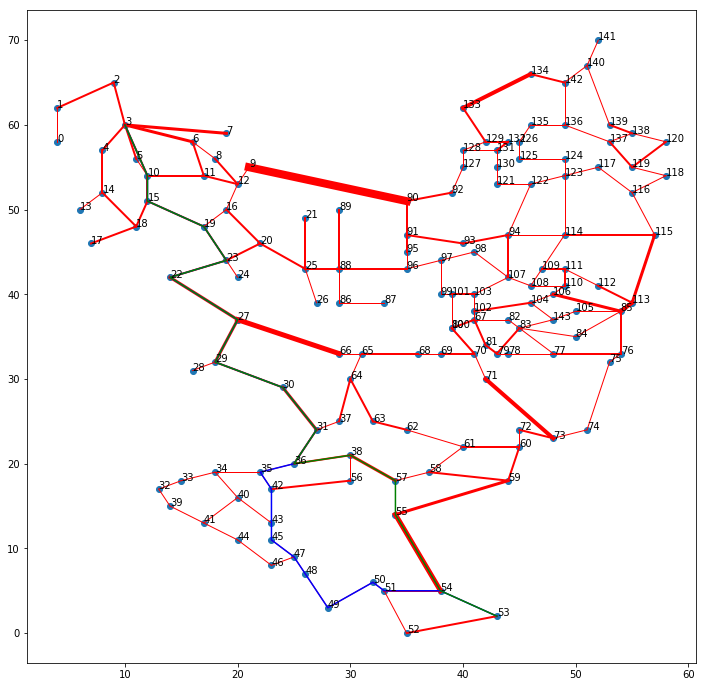

In [51]:
visualize_graph(UCLA, node_path_1, node_path_2)

In [52]:
def find_distance(path_by_key,nodes): # used to check g_score
    dist=0
    for i in range(len(path_by_key)):
        if i+1>=len(path_by_key):
            break
        for n_w in nodes[path_by_key[i]].neighbors_and_weights:
            found_path=False
            if n_w[0]==path_by_key[i+1]:
                dist+=n_w[1]
                found_path=True
                break
        if found_path==False:
            print 'Path does not exsit!'
            return
    return dist

In [ ]:
print find_distance(path_by_key1,UCLA)
print find_distance(path_by_key2,UCLA)
print find_distance(dijkstra(UCLA,3,53)[1],UCLA)

In [ ]:
iters = 30
# comparing the running time
first_alg_times = []
second_alg_times = []
third_alg_times = []
forth_alg_times = []
for k in range(0,iters):
    nodes=UCLA
    
    time_prev =time.time()
    for j in range(len(nodes)): # Total time takes to compute from node k to every other node
        A_star(nodes,k,j)
    first_alg_times.append(time.time()-time_prev)

    time_prev =time.time()
    for j in range(len(nodes)):
        preprocessed_A_star(nodes,k,j)
    second_alg_times.append(time.time()-time_prev)
    
    time_prev =time.time()
    for j in range(len(nodes)):
        preprocessed_A_star_2(nodes,k,j)
    third_alg_times.append(time.time()-time_prev)
    
    time_prev =time.time()
    for j in range(len(nodes)):
        dijkstra(nodes,k,j)
    forth_alg_times.append(time.time()-time_prev)
    
plt.plot(range(0,iters),first_alg_times,color='red', label = 'A*')
plt.plot(range(0,iters),second_alg_times,color='blue', label = 'Precomputed A*')
plt.plot(range(0,iters),third_alg_times,color='black', label = 'Precomputed A*_2')
plt.plot(range(0,iters),forth_alg_times,color='green', label = 'dijkstra')
plt.legend()

plt.xlabel('node')
plt.ylabel('time in seconds')
plt.title('Comparing four algorithms')
plt.grid(True)

plt.show()
# this takes more time to run